### Firnanda Putra Agustinus (2213020150)
### Laplacian

In [114]:
# Import Library
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# Baca gambar dengan OpenCV (dalam BGR)
gambar = cv2.imread('doraemon.jpg')

In [116]:
# Ubah BGR ke RGB
gambar_rgb = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)

In [117]:
# Ambil dimensi gambar
tinggi, lebar, _ = gambar_rgb.shape

In [ ]:
# Ubah ke array
rgb = np.array(gambar_rgb)
rgb

array([[[  0, 169, 238],
        [  0, 169, 238],
        [  0, 169, 238],
        ...,
        [  0, 169, 238],
        [  0, 169, 238],
        [  0, 169, 238]],

       [[  0, 169, 238],
        [  0, 169, 238],
        [  0, 169, 238],
        ...,
        [  0, 169, 238],
        [  0, 169, 238],
        [  0, 169, 238]],

       [[  0, 169, 236],
        [  0, 169, 236],
        [  0, 169, 236],
        ...,
        [  0, 169, 236],
        [  0, 169, 236],
        [  0, 169, 236]],

       ...,

       [[146, 209, 201],
        [139, 202, 194],
        [150, 213, 205],
        ...,
        [142, 199, 128],
        [142, 200, 126],
        [142, 200, 126]],

       [[147, 209, 204],
        [141, 203, 198],
        [149, 211, 206],
        ...,
        [141, 199, 125],
        [141, 199, 123],
        [141, 199, 123]],

       [[148, 210, 205],
        [143, 205, 200],
        [146, 208, 203],
        ...,
        [141, 199, 125],
        [141, 199, 123],
        [141, 199, 123]]

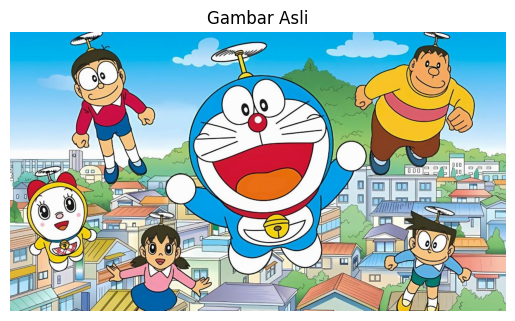

In [119]:
# Tampilkan gambar asli
plt.imshow(rgb)
plt.axis('off')
plt.title('Gambar Asli')
plt.show()


In [120]:
# Fungsi manual konversi ke grayscale
def convert_to_grayscale(pixel):
    r, g, b = pixel
    return int(0.299 * r + 0.587 * g + 0.114 * b)

In [121]:
grayscale_img = []
for y in range(tinggi):
    row = []
    for x in range(lebar):
        pixel = rgb[y, x]
        index = convert_to_grayscale(pixel)
        row.append(index)
    grayscale_img.append(row)

grayscale_img = np.array(grayscale_img)
grayscale_img

array([[126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       ...,
       [189, 182, 193, ..., 173, 174, 174],
       [189, 183, 191, ..., 173, 172, 172],
       [190, 185, 188, ..., 173, 172, 172]], shape=(675, 1200))

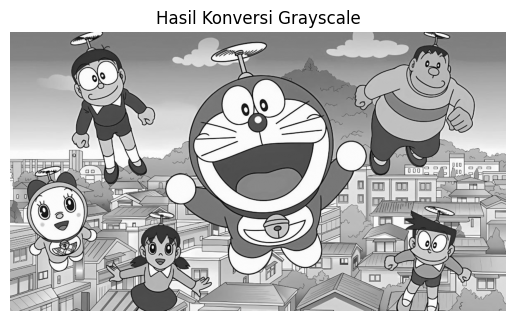

In [ ]:
# Tampilan Gambar Greyscale
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')
plt.title('Hasil Konversi Grayscale')
plt.show()

## Deteksi Tepi Laplacian

In [ ]:
# Kernel Laplacian
Laplacian = [[0,  1, 0],
             [1, -4, 1],
             [0,  1, 0]]

In [ ]:
# Operasi Manual laplacian
def apply_laplacian_operator(img):
    gradient_magnitude = np.zeros((tinggi, lebar), dtype=np.uint8)

    for y in range(1, tinggi - 1):
        for x in range(1, lebar - 1):
            laplacian_sum = 0

            for i in range(3):
                for j in range(3):
                    pixel = img[y + i - 1, x + j - 1]
                    laplacian_sum += Laplacian[i][j] * pixel

            value = abs(laplacian_sum)
            gradient_magnitude[y, x] = min(int(value), 255)

    return gradient_magnitude

In [ ]:
# Gabungkan Gradien
edges = apply_laplacian_operator(grayscale_img)
edges = np.array(edges)
edges

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  1, 96, ...,  2,  3,  0],
       [ 0, 15, 28, ...,  1,  3,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], shape=(675, 1200), dtype=uint8)

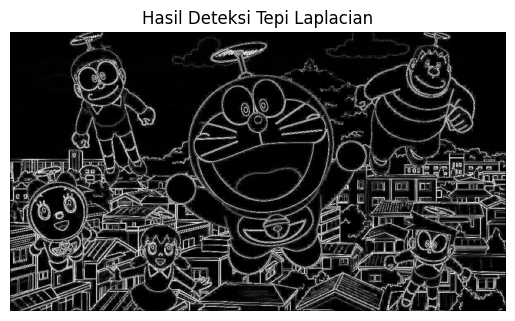

In [127]:
# Tampilkan Hasil
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Hasil Deteksi Tepi Laplacian')
plt.show()